In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [21]:
def feed_forward(data_in, w0,w1, b0,b1):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a classification node.
    
    returns: state of each layer
    '''
    layer0 = data_in
    layer1 = tanh(np.dot(layer0, w0)+b0)
    layer2 = sigmoid(np.dot(layer1, w1)+b1)

    return layer0, layer1, layer2

In [46]:
def backpropogate(i, layer0, layer1, layer2, actual_y, w0,w1,b0,b1, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    Since the output layer is not a function of any activation function,
    the delta doesn't need to be multiplied with the transfer derivative of the
    output layer.
    
    The rest is all the same.
    
    returns: weights and bias matrices
    '''
    
    l2_error = layer2 - actual_y
    l2_delta = l2_error * dtanh(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dtanh(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)

    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))    
   
    if i%10==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%100 == 0:
            print("\n", int(i), loss)

        
    return w0, w1, b0,b1

In [85]:
def accuracy(testx, testy):
    correct = 0
    layer0, layer1, layer2 = feed_forward(testx,w0, w1, b0,b1)
    for i in range(len(testx)):
        if np.argmax(layer2[i]) == np.argmax(testy[i]):
            correct +=1 
            
    return f"Accuracy: {correct*100/len(testy)}%"

### Working on Wine Classification


In [61]:
input_data=np.array([[0,0,0],
                    [0,0,1],
                    [0,1,0],
                     [0,1,1],
                     [1,1,0],
                    [1,0,0]])
output_labels= np.array([[0],
       [1],
       [1],
       [1],
        [1],
       [1]])

In [74]:
len(X.keys())

13

In [75]:
x = input_data

In [76]:
x

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 1, 0],
       [1, 0, 0]])

In [77]:
y = output_labels

In [78]:
y

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [79]:
np.random.seed(3)

w0 = np.random.random((3,2))
w1 = np.random.random((2,1))

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1

epochs = 5

In [80]:
# Initialising variables to track loss vs iterations so we can plot the changes
loss_curve = []
iters = []

In [81]:
for i in tqdm_notebook(range(epochs)):
    layer0, layer1, layer2 = feed_forward(x, w0,w1, b0,b1)
    w0,w1, b0,b1 = backpropogate(i,layer0, layer1, layer2, y, w0,w1, b0,b1, 0.005 )
    

A Jupyter Widget

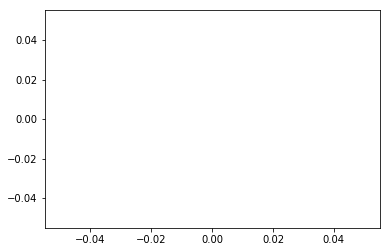

In [82]:
plt.plot(iters, loss_curve,'r')

In [86]:
accuracy(x, y)

'Accuracy: 100.0%'

In [91]:
layer0,layer1,layer2=feed_forward([0,0,0], w0, w1, b0, b1)

In [92]:
print(layer0, layer1, layer2)

[0, 0, 0] [[-0.7383688 -0.7383688]] [[0.31182742]]
